In [ ]:
from learning.learner import calculate_error, KernelRegressor
from learning.graph import Point
import numpy as np
import matplotlib.pyplot as plt

def lissajous(A, a, B, b, delta, n_points=1000):
    ts = np.linspace(0, 2*np.pi, n_points)
    xs = A * np.cos(a * ts)
    ys = B * np.sin(b * ts + delta)
    return [Point(t, x, y) for t,x,y in zip(ts, xs, ys)]
    
L = lissajous(1, 2, 1, 3, 0)
K = KernelRegressor(0.1, 'normal')
R = K.fit_predict(L, 1000)

for b in [0.1, 0.5, 1]:
    K = KernelRegressor(b, 'normal')
    R = K.fit_predict(L, 1000)
    f = calculate_error(L, R)
    print(f"bw={b}, mse={f}")

def plot_graph(L, R):
    plt.figure(figsize=(10, 10))

    # Plot original data
    plt.scatter([l.x for l in L], [l.y for l in L], color='black', alpha=0.5, label='Data points')
    plt.plot([l.x for l in R], [l.y for l in R], color='red', label=f'Bandwidth = 0.1')
    plt.title('Kernel Regression with Different Kernels (Larger Output Range)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


0.0019249558097754519


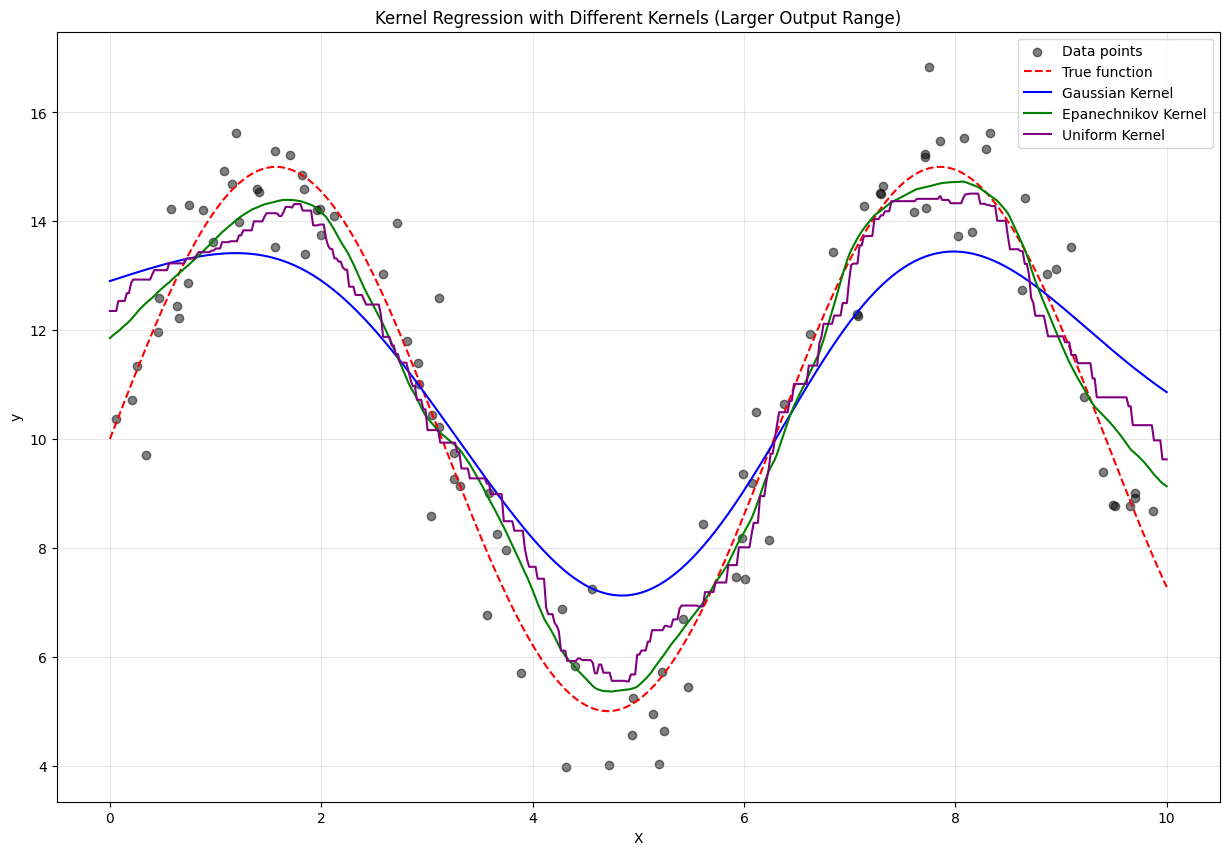

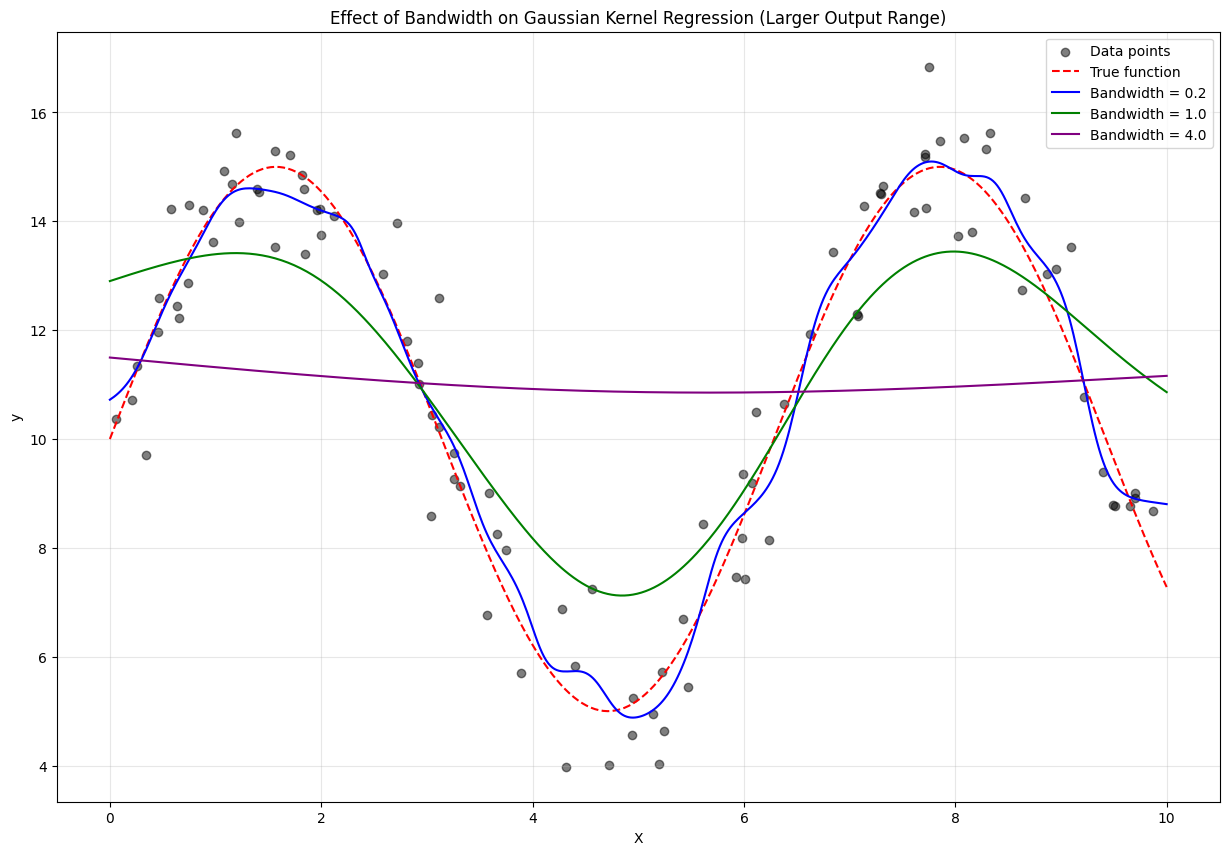

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

class KernelRegression:
    def __init__(self, kernel: Callable, bandwidth: float):
        self.kernel = kernel
        self.bandwidth = bandwidth
        self.X_train = None
        self.y_train = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Store training data for later prediction"""
        self.X_train = X
        self.y_train = y
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions using kernel regression"""
        predictions = np.zeros(len(X))
        
        for i, x in enumerate(X):
            weights = self.kernel((x - self.X_train) / self.bandwidth)
            predictions[i] = np.sum(weights * self.y_train) / np.sum(weights)
            
        return predictions

# Define different kernel functions
def gaussian_kernel(x: np.ndarray) -> np.ndarray:
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def epanechnikov_kernel(x: np.ndarray) -> np.ndarray:
    return np.where(np.abs(x) <= 1, 0.75 * (1 - x**2), 0)

def uniform_kernel(x: np.ndarray) -> np.ndarray:
    return np.where(np.abs(x) <= 1, 0.5, 0)

# Generate sample data with larger output range
np.random.seed(42)
X = np.sort(np.random.uniform(0, 10, 100))
# Increased amplitude of sine wave to 5 and added vertical shift of 10
y = 5 * np.sin(X) + 10 + 1.0 * np.random.randn(100)

# Create test points for smooth predictions
X_test = np.linspace(0, 10, 500)

# Initialize models with different kernels
# Increased bandwidth to handle larger y-range
models = {
    'Gaussian': KernelRegression(gaussian_kernel, bandwidth=1.0),
    'Epanechnikov': KernelRegression(epanechnikov_kernel, bandwidth=1.0),
    'Uniform': KernelRegression(uniform_kernel, bandwidth=1.0)
}

# Create visualization
plt.figure(figsize=(15, 10))

# Plot original data
plt.scatter(X, y, color='black', alpha=0.5, label='Data points')
plt.plot(X_test, 5 * np.sin(X_test) + 10, 'r--', label='True function')

# Plot kernel regression predictions
colors = ['blue', 'green', 'purple']
for (name, model), color in zip(models.items(), colors):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, color=color, label=f'{name} Kernel')

plt.title('Kernel Regression with Different Kernels (Larger Output Range)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Demonstrate bandwidth effects with adjusted bandwidths
bandwidths = [0.2, 1.0, 4.0]  # Increased bandwidths for larger scale
gaussian_models = [KernelRegression(gaussian_kernel, bw) for bw in bandwidths]

plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='black', alpha=0.5, label='Data points')
plt.plot(X_test, 5 * np.sin(X_test) + 10, 'r--', label='True function')

colors = ['blue', 'green', 'purple']
for model, bw, color in zip(gaussian_models, bandwidths, colors):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, color=color, label=f'Bandwidth = {bw}')

plt.title('Effect of Bandwidth on Gaussian Kernel Regression (Larger Output Range)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Frame 0, Time: 0.00s, BBox: [390, 290, 411, 311], Center: [400, 300]
Frame 1, Time: 0.02s, BBox: [391, 290, 412, 311], Center: [401, 300]
Frame 2, Time: 0.04s, BBox: [392, 291, 413, 312], Center: [402, 301]
Frame 3, Time: 0.06s, BBox: [392, 292, 413, 313], Center: [402, 302]
Frame 4, Time: 0.08s, BBox: [392, 293, 413, 314], Center: [402, 303]
Frame 5, Time: 0.10s, BBox: [392, 294, 413, 315], Center: [402, 304]
Frame 6, Time: 0.12s, BBox: [392, 295, 413, 316], Center: [402, 305]
Frame 7, Time: 0.14s, BBox: [391, 296, 412, 317], Center: [401, 306]
Frame 8, Time: 0.16s, BBox: [390, 297, 411, 318], Center: [400, 307]
Frame 9, Time: 0.18s, BBox: [389, 297, 410, 318], Center: [399, 307]
Frame 10, Time: 0.20s, BBox: [388, 298, 409, 319], Center: [398, 308]
Frame 11, Time: 0.22s, BBox: [387, 298, 408, 319], Center: [397, 308]
Frame 12, Time: 0.24s, BBox: [386, 298, 407, 319], Center: [396, 308]
Frame 13, Time: 0.26s, BBox: [385, 299, 406, 320], Center: [395, 309]
Frame 14, Time: 0.28s, BBox: [